In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


df_yeoung =pd.read_csv(r'C:\Users\sebiy\cp1\df_yeong.csv')

In [5]:
#영등포구

df_yeoung['대여일자'] = df_yeoung['대여일자'].replace('"','')
df_yeoung = df_yeoung.set_index('대여일자')

In [6]:
final_diff = df_yeoung.diff().dropna() #1차 차분

train = final_diff.iloc[:-30,:]  #train test split 한 달치 데이터가 테스트 데이터
test = final_diff.iloc[-30:,:]
print(train.shape)
print(test.shape)

(150, 28)
(30, 28)


In [11]:
# VAR 모델은 예측할 변수의 과거 값뿐만 아니라 예측할 변수와 의존성이 있는 변수 들까지 고려하여 예측함

model_yeoung = VAR(train)

maxlags_yeoung = 4 #가장 낮은 AIC score 를 주는 p 값
lagged_values_yeoung = train.values[-4:] #4일 동안의 훈련

print(model_yeoung.select_order(maxlags_yeoung))

result_yeoung = model_yeoung.fit(maxlags=maxlags_yeoung, ic='aic')
print(result_yeoung.summary())

print(result_yeoung.forecast(y= lagged_values_yeoung, steps=30)) #향후 30일간을 예측

c:\Users\sebiy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 0, FPE -> 4, HQIC ->  4>
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Sep, 2022
Time:                     02:14:56
--------------------------------------------------------------------
No. of Equations:         28.0000    BIC:                    189.991
Nobs:                     146.000    HQIC:                   151.604
Log likelihood:          -11785.9    FPE:                4.58814e+60
AIC:                      125.332    Det(Omega_mle):     4.91047e+53
--------------------------------------------------------------------
Results for equation 구로동
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.099434         0.505942            0.197           0.844
L1.구로동           -0.285512     

In [9]:
model_yeoung = VAR(train)

results_aic = []
for p in range(1,5):
  results = model_yeoung.fit(p)
  results_aic.append(results.aic)

c:\Users\sebiy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


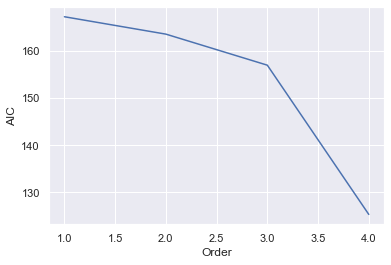

In [10]:
#가장 낮은 p 값 찾기 

sns.set()
plt.plot(list(np.arange(1,5,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [14]:
#30일간의 예측값 
#태블로 시각화 예정

forecast_yeoung = pd.DataFrame(result_yeoung.forecast(y= lagged_values_yeoung, steps=30), index = test.index, columns=['구로동', '당산동', '당산동1가', '당산동2가', '당산동3가', '당산동4가', '당산동5가', '당산동6가',
       '대림동', '도림동', '문래동3가', '문래동4가', '문래동5가', '문래동6가', '신길동', '양평동1가',
       '양평동2가', '양평동3가', '양평동4가', '양평동5가', '양화동', '여의도동', '영등포동', '영등포동1가',
       '영등포동2가', '영등포동4가', '영등포동7가', '영등포동8가'])

forecast_yeoung.head()

,구로동,당산동,당산동1가,당산동2가,당산동3가,당산동4가,당산동5가,당산동6가,대림동,도림동,...,양평동4가,양평동5가,양화동,여의도동,영등포동,영등포동1가,영등포동2가,영등포동4가,영등포동7가,영등포동8가
대여일자,,,,,,,,,,,,,,,,,,,,,
"""2022-06-01""",7.224803,25.092909,24.481262,28.384255,215.274540,317.081078,15.011446,-225.828905,159.292776,63.559295,...,-46.792323,99.253409,-112.456867,815.170616,-12.485627,21.543362,24.588078,37.829623,83.516099,51.288933
"""2022-06-02""",-9.791976,23.180093,-18.671254,-20.939332,-197.007418,-248.936008,63.960064,543.758662,-68.914561,68.980310,...,214.546881,-4.487637,208.070028,1264.081493,17.334674,39.526435,17.783384,129.511036,-7.154969,-12.890918
"""2022-06-03""",-1.111774,25.394481,-4.754964,-14.219010,16.991297,8.557088,15.629511,-80.914765,-41.763918,-23.733518,...,-56.166175,-36.114752,29.224362,73.111669,-100.018303,-40.373623,-4.955540,-128.654758,-55.608527,-46.829762
"""2022-06-04""",13.996075,-23.723862,-18.855791,8.929550,-50.870053,-101.719110,-2.768122,125.965842,-10.035551,31.855762,...,88.332217,25.517986,19.397978,-72.382516,129.622460,-8.150007,-6.273722,186.111531,2.735899,8.074819
"""2022-06-05""",-15.408809,-133.084376,-29.949540,-49.018259,-150.314554,-297.168923,-243.221675,-544.881915,-135.696979,-206.850139,...,-271.867061,-214.424225,-177.884321,-2848.884891,-199.330740,-66.787132,-62.805042,-194.394736,-141.455023,-88.827061


In [13]:
df_yeoung.columns

Index(['구로동', '당산동', '당산동1가', '당산동2가', '당산동3가', '당산동4가', '당산동5가', '당산동6가',
       '대림동', '도림동', '문래동3가', '문래동4가', '문래동5가', '문래동6가', '신길동', '양평동1가',
       '양평동2가', '양평동3가', '양평동4가', '양평동5가', '양화동', '여의도동', '영등포동', '영등포동1가',
       '영등포동2가', '영등포동4가', '영등포동7가', '영등포동8가'],
      dtype='object')

In [15]:
forecast_yeoung.to_csv('forecast_yeoung.csv')

In [16]:
#pickle
import joblib

joblib.dump(model_yeoung, './model_yeoungpickle.pkl')

['./model_yeoungpickle.pkl']